HW2: Challenges 4.1 and 4.2



In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation
import math
import itertools as itool

In [15]:
class BoundaryCondition:
    RBC, PBC = range(2)
    
class StartConf:
    Triangular, Rectangular, Random, Confined = range(4)

#-------------------------#

class particle2(object):

    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.fx = 0.
        self.fy = 0.
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + self.fx/self.mass*dt
        self.vy = self.vy + self.fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt
        
    def accel(self, dt):
        self.vx = self.vx + self.fx/self.mass*dt
        self.vy = self.vy + self.fy/self.mass*dt
        
    def move(self, dt, dt2half):
        self.x = self.x + self.vx*dt + self.fx/self.mass*dt2half
        self.y = self.y + self.vy*dt + self.fy/self.mass*dt2half   
    

In [16]:
#list(itool.product(range(1,5),range(1,6)))

v2_total = np.zeros(shape=(13,7))


for i in range(13):
    for n in range(7):
        v2_total[i,n] = i*n
        
print v2_total

v2_total = 5*v2_total
print v2_total

j = sum(v2_total[:,2])
print j


j = int(j)
int(5.12)

print range(31)


[[  0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   2.   3.   4.   5.   6.]
 [  0.   2.   4.   6.   8.  10.  12.]
 [  0.   3.   6.   9.  12.  15.  18.]
 [  0.   4.   8.  12.  16.  20.  24.]
 [  0.   5.  10.  15.  20.  25.  30.]
 [  0.   6.  12.  18.  24.  30.  36.]
 [  0.   7.  14.  21.  28.  35.  42.]
 [  0.   8.  16.  24.  32.  40.  48.]
 [  0.   9.  18.  27.  36.  45.  54.]
 [  0.  10.  20.  30.  40.  50.  60.]
 [  0.  11.  22.  33.  44.  55.  66.]
 [  0.  12.  24.  36.  48.  60.  72.]]
[[   0.    0.    0.    0.    0.    0.    0.]
 [   0.    5.   10.   15.   20.   25.   30.]
 [   0.   10.   20.   30.   40.   50.   60.]
 [   0.   15.   30.   45.   60.   75.   90.]
 [   0.   20.   40.   60.   80.  100.  120.]
 [   0.   25.   50.   75.  100.  125.  150.]
 [   0.   30.   60.   90.  120.  150.  180.]
 [   0.   35.   70.  105.  140.  175.  210.]
 [   0.   40.   80.  120.  160.  200.  240.]
 [   0.   45.   90.  135.  180.  225.  270.]
 [   0.   50.  100.  150.  200.  250.  300.]
 [   0.   

In [17]:
class MDsystem(object):

    def __init__(self, lx, ly, N, dt, bc): 
        self.N = N
        self.lx = ly
        self.ly = lx
        self.dt = dt
        self.dt2 = dt*dt
        self.dthalf = dt * 0.5
        self.dt2half = self.dt2 * 0.5
        self.bc = bc
        self.particles = [particle2()]
        for i in range(1,N):
            self.particles.append(particle2()) # we create a list of N particles

    def init(self, config, vmax):
        np.random.seed(1272121) # arbitrary seed                    Was ist dieser seed?
        nrows = int(math.sqrt(N*float(self.ly)/float(self.lx)));
        ncols = int(math.sqrt(N*float(self.lx)/float(self.ly)));
        ax = float(lx) / float(ncols);
        ay = float(ly) / float(nrows);
        i = 0;

        if config == StartConf.Triangular:
            #Challenge
            return
        elif config == StartConf.Rectangular:
            for row, col in itool.product(range(nrows),range(ncols)):
                if i >= self.N: 
                    break
                self.particles[i].x = col*ax+ax/2
                self.particles[i].y = row*ay+ay/2
                i+=1

            for row, col in itool.product(range(1,nrows),range(1,ncols)):
                if i >= self.N: 
                    break
                self.particles[i].x = col*ax/2.+ax/2.
                self.particles[i].y = row*ay/2.+ay/2.
                i+=1
                
        elif config == StartConf.Confined:
            for row, col in itool.product(range(nrows),range(ncols)):
                if i >= self.N: 
                    break
                self.particles[i].x = (col*ax+ax/2.)/2.
                self.particles[i].y = (row*ay+ay/2.)
                i+=1
                
   
            for row, col in itool.product(range(1,nrows),range(1,ncols)):
                if i >= self.N: 
                    break
                self.particles[i].x = (col*ax/2.+ax/2.)/2.
                self.particles[i].y = (row*ay/2.+ay/2.)
                i+=1
                
        elif config == StartConf.Random:
            for i in range(self.N):
                overlap = True;
                while overlap:
                    overlap = False;
                    self.particles[i].x = np.random.random()*self.lx
                    self.particles[i].y = np.random.random()*self.ly
                    for j in range(i):
                        r12 = self.distance(seld.particle[i], self.particle.p[j])
                        if r12 < 1.: 
                            overlap = True;
                            break
                                
        # Velocities
        for p in self.particles:
            p.vx = vmax*(2. * np.random.random() - 1);
            p.vy = vmax*(2. * np.random.random() - 1);

        # We set total momentum to zero
        vxcm = 0.
        vycm = 0. # Velocity of the center of mass
        for p in self.particles:
            vxcm += p.vx;
            vycm += p.vy;
        
        vxcm /= self.N
        vycm /= self.N
        for p in self.particles:
            p.vx -= vxcm;
            p.vy -= vycm;
            
        self.forces()          
        
    def evolve(self):
        for p in self.particles:
            p.move(self.dt, self.dt2half)
            p.accel(self.dthalf)
            self.boundary(p)

        self.forces()

        for p in self.particles:
            p.accel(self.dthalf)

        
    def distance(self, p, other):
        (r12, dx, dy) = self.distance2(p, other)
        return math.sqrt(r12)

    def distance2(self, p, other):
        dx = other.x - p.x;
        dy = other.y - p.y;
        # nearest image convention
        if self.bc == BoundaryCondition.PBC:
            if abs(dx) > self.lx/2:
                dx -= dx*lx/abs(dx)
                
            if abs(dy) > self.ly/2:
                dy -= dy*ly/abs(dy)
        
        r12 = dx * dx + dy * dy
        return (r12, dx, dy)

    def force(self, p, other):  #Lennard-Jones
        (r12,dx,dy) = self.distance2(p, other)
        r2 = 1./r12
        r6 = r2 * r2 * r2
        f = 24.*r2*r6*(2.*r6-1.)
        fx = f*(-dx)
        fy = f*(-dy)
        return (fx, fy);
      
    def forces(self):
        # Compute the interaction forces between particles
        for p in self.particles:
            p.fx = 0.
            p.fy = 0.
    
        for i in range(self.N):
            p = self.particles[i]
            for j in range(i+1,self.N):
                other = self.particles[j]
                (fx, fy) = self.force(p, other)
                p.fx += fx
                p.fy += fy
                other.fx -= fx
                other.fy -= fy

    def boundary(self, p):
        if self.bc == BoundaryCondition.RBC:
            
            if p.x < 0:  
                p.x = -p.x
                p.vx = -p.vx
            if p.y < 0:
                p.y = -p.y
                p.vy = -p.vy
            if p.x > self.lx:
                p.x = 2*self.lx - p.x
                p.vx = -p.vx
            if p.y > self.ly:
                p.y = 2*self.ly - p.y
                p.vy = -p.vy

        elif self.bc == BoundaryCondition.PBC:

            if p.x < 0: 
                p.x += lx
            elif p.x > lx:  
                p.x -= lx
            if p.y < 0:  
                p.y += ly
            elif p.y > ly:  
                p.y -= ly
#            c = (p.x+2*self.lx)/self.lx
#            p.x = p.x + 2*self.lx - int(c)*self.lx
#            c = (p.y+2*self.ly)/self.ly
#            p.y = p.y + 2*self.ly - int(c)*self.ly
            
    def kinetic_energy(self): # Challenge
        ke = 0.
        return ke
    
    def pot_energy(self): # Challenge
        pe = 0.
        return pe
    
    def total_energy(self):
        return self.kinetic_energy()+self.pot_energy()

4.2 c) Write the code for simulating a two dimensional system of particles
interacting via a Lennard-Jones potential. Consider $N=12$ particles in
a box of linear dimensions $L_x=L_y=8$. For this choice of $N$ and $L$
the density $\rho =12/64=0.19$. Suppose that the particles are initially
constrained to be in the left part of the box and placed on a
rectangular grid. At $t=0$ the constraint is removed and the particles
move freely throughout the entire box. Use $v_{\max }=1.0$, the maximum
initial speed, and $\Delta t=0.02$.


There are four parts to this question:

i) Compute n(t) the number of particles on the left hand side of the box. 

ii) Plot its value as a function of time. 

iii) What is the qualitative behavior of n(t)? 

iv) What is the mean number of particles on the left side?

The average number of particles on the left is: 6.086075


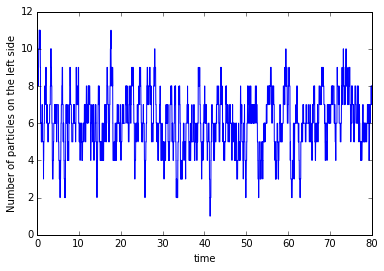

In [18]:
lx = 8
ly = 8
N = 12
dt = 0.001
v0 = .001
tmax = 80.
tsteps = int(tmax/dt)

S = MDsystem(lx, ly, N, dt, BoundaryCondition.RBC)
S.init(StartConf.Confined, v0)

x = np.zeros(N)
y = np.zeros(N)
x_total = np.zeros(shape=(tsteps,N))     # Create matrices to store the position vs. time data for each atom
y_total = np.zeros(shape=(tsteps,N))     
left_count = np.zeros(shape=(tsteps,1))


#fig = pyplot.figure()
#ax = pyplot.axes(xlim=(0, lx), ylim=(0, ly), xlabel='X', ylabel='Y')
#points, = ax.plot([], [], marker='o', linestyle='None')

def animate(i):
    S.evolve()
    for n in range(S.N):
        p = S.particles[n]
        x[n] = p.x
        y[n] = p.y  
    points.set_data(x, y)
    return points


#anim = animation.FuncAnimation(fig, animate, frames = 10, interval=10, blit=True)



for i in range(tsteps):
    S.evolve()
    for n in range(S.N):
        p = S.particles[n]
        x_total[i,n] = p.x
        y_total[i,n] = p.y
        if p.x < 4:
            left_count[i] += 1
    
    
    
t_array = np.linspace(dt,tmax,tsteps)
    
pyplot.plot(t_array[:], left_count[:], color='blue', ls='-', lw=1)
pyplot.xlabel('time')
pyplot.ylabel('Number of particles on the left side');

avg_count = sum(left_count)/len(left_count)
print 'The average number of particles on the left is: %f' % avg_count

#display_animation(anim, default_mode='once')


Challenge 4.2:

### Exercise 4.3: Approach to equilibrium II 

Consider $N=12$ particles in a box of linear dimensions $L_x=L_y=8$.
Consider the initially the particles are placed in a rectangular grid
and the velocities are random with $v_{\max }=1.0$.

1.  Do a number of MD steps (50,100) and average the quantity $\left| 
    \mathbf{v}\right| ^{2}$ to estimate the actual temperature. To
    adjust the temperature to a desired value, scale all velocity
    components for all particles in a suitable way. Repeat this
    procedure up to 10 times. After 500-1000 steps the fluid will be
    well equilibrated and the temperature will be steady (although
    fluctuating slightly). Use $\Delta t=0.02$. Pick $T=1,2,4$ in units of $\epsilon/k$.

2.  Plot the temperature averaged over intervals of 5 time steps as a
    function of time for each of the previous temperatures. What is the
    qualitative dependence of the temperature fluctuations?

3.  Calculate the kinetic and potential energies as a function of time.
    Are the kinetic and potential energies conserved separately?

I set $(1/2)mv^2 = k_BT$, where there are 2 degrees of freedom because we are in 2-D space and each DOF contributes $(1/2)k_bT$. I then set my units so, $k_B = 1.0$.

Answers to questions:

(1) All plots are below.

(2) The temperature flucations are due to energy being converted between kinetic and potential energy. The temperature is solely due to the kinetic energy of the material, as seen by the equation above. In our simulations we assign each particle a distance dependent potential. As a result, the potential energy of the particles and the system will change depending on their relative locations; however, the total energy is awlays conserved. This means that the total energy will be split between the kinetic and potential energies; however, the kinetic and potential energy ratio will change over time. As a result, the kinetic energy and temperature will change over time. This is a result of the temperature fluctuations.

(3) The total energy is conserved; however, separately the kinetic and potential energy terms are not conserved. 

In [46]:
lx = 8.
ly = 8.
N = 12
dt = 0.001
v0 = 1.
tmax = 50.
tsteps = int(tmax/dt)

T = 4.                    # Desired Temperature
cf = 5

S = MDsystem(lx, ly, N, dt, BoundaryCondition.RBC)
S.init(StartConf.Rectangular, v0)

x_total = np.zeros(shape=(tsteps,N))     # Create matrices to store the position vs. time data for each atom
y_total = np.zeros(shape=(tsteps,N))  
v2_total = np.zeros(shape=(tsteps,N))     # Create matrices to store the v^2 vs. time data for each atom
T_total = np.zeros(shape=(int(tsteps/cf),1))

# Construct nested 'for' loops to measure the temperature and then scale it
jmax = 10    # the number of times the temperature is scaled
kmax = 100     # after the number of i

#  --------------------------- # 

i = 0    # Used to count the time steps

# Loop to adjust the temperature
for j in range(jmax):
    for k in range(kmax):
        S.evolve()
        for n in range(S.N):
            p = S.particles[n]
            x_total[i,n] = p.x     # These values will be used to compute the potential later
            y_total[i,n] = p.y
            
            v2_total[i,n] = p.vx*p.vx + p.vy*p.vy
        i += 1
            
    v2_avg = sum(v2_total[i-1,:])/float(N)    # Current average v^2
    T_est = 0.5*p.mass*v2_avg             # Estimated temp.
    T_ratio = math.sqrt(T/T_est)

    
    # scale the temp values
    for l in range(N):
        p = S.particles[l]
        #print 'Prior p.vx: {} at l = {}' .format(p.vx, l)
        p.vx = T_ratio*p.vx
        p.vy = T_ratio*p.vy
        #print 'Post p.vx: {} at l = {} \n' .format(p.vx, l)


#  --------------------------- #        

# Now run the remainder of the steps           
for i in range(jmax*kmax, tsteps):
    S.evolve()
    for n in range(S.N):
        p = S.particles[n]
        x_total[i,n] = p.x     # These values will be used to compute the potential later
        y_total[i,n] = p.y
        v2_total[i,n] = p.vx*p.vx + p.vy*p.vy


#  --------------------------- #  


#for i in range(int(tsteps/cf)):
#    T_total[i] = 0.5*p.mass*sum(v2_total[i*cf,:])/float(N)
    
for i in range(int(tsteps/cf)):
    for j in range(cf):
        T_total[i] += 0.5*p.mass*sum(v2_total[i*cf+j,:])/float(N)
    
T_total /=5
    
t_array = np.linspace(dt*cf,tmax,tsteps/cf)




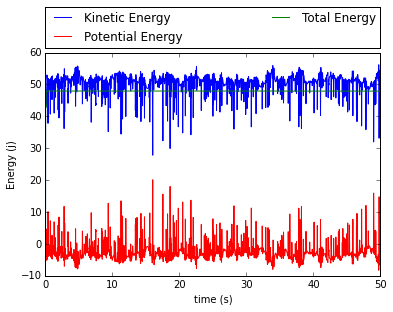

In [47]:
kinetic_energy = T_total*12.
potential_energy = np.zeros(shape=(len(t_array[:]),1))     # Create matrices to store the v^2 vs. time data for each atom


# calculate the potential energy
for i in range(int(len(x_total[:,1])/cf)):
    for j in range(N):
        for k in range(N):
            for l in range(cf):
                # sum in steps of 5 intervals the potential energy
                if k != j:
                    r2 = (x_total[i*cf+l,j]-x_total[i*cf+l,k])*(x_total[i*cf+l,j]-x_total[i*cf+l,k])+(y_total[i*cf+l,j]-y_total[i*cf+l,k])*(y_total[i*cf+l,j]-y_total[i*cf+l,k])
                    r6 = r2*r2*r2
                    potential_energy[i] += (1/(r6*r6)-1/r6)    # Here we set v_0 = 1. and a = 1.

                    
potential_energy *= 2./5.  # The Lennard-Jones potential has a coefficient of 4, but I purposefully double counted, so I am dividing by 2.
                           # I am dividing by 5 because I summed 5 iterations of values.

Total_energy = (kinetic_energy + potential_energy)



pyplot.plot(t_array[:], kinetic_energy[:], color='blue', ls='-', lw=1, label='Kinetic Energy')
pyplot.plot(t_array[:], potential_energy[:], color='red', ls='-', lw=1, label='Potential Energy')
pyplot.plot(t_array[:], Total_energy[:], color='green', ls='-', lw=1, label='Total Energy')
pyplot.xlabel('time (s)')
pyplot.ylabel('Energy (j)');

pyplot.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

------------------------------------------------------------.

Energy Plots are Below:

------------------------------------------------------------.

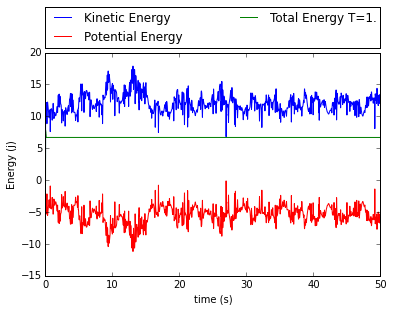

In [31]:
# Store values for T = 1.
potential_energy1 = np.zeros(shape=(len(t_array[:]),1))
kinetic_energy1 = np.zeros(shape=(len(t_array[:]),1))     
Total_energy1 = np.zeros(shape=(len(t_array[:]),1))

#potential_energy1 = potential_energy
#kinetic_energy1 = kinetic_energy
#Total_energy1 = Total_energy

# Plot energy of T=1.
pyplot.plot(t_array[:], kinetic_energy1[:], color='blue', ls='-', lw=1, label='Kinetic Energy')
pyplot.plot(t_array[:], potential_energy1[:], color='red', ls='-', lw=1, label='Potential Energy')
pyplot.plot(t_array[:], Total_energy1[:], color='green', ls='-', lw=1, label='Total Energy T=1.')
pyplot.xlabel('time (s)')
pyplot.ylabel('Energy (j)');

pyplot.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

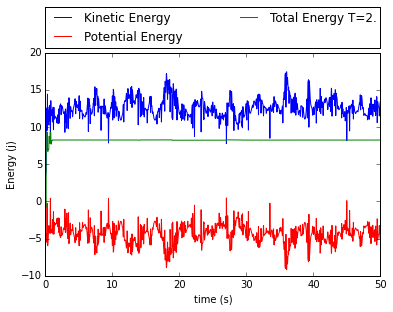

In [39]:
# Store values for T = 2.
potential_energy2 = np.zeros(shape=(len(t_array[:]),1))
kinetic_energy2 = np.zeros(shape=(len(t_array[:]),1))     
Total_energy2 = np.zeros(shape=(len(t_array[:]),1))

potential_energy2 = potential_energy
kinetic_energy2 = kinetic_energy
Total_energy2 = Total_energy

# Plot energy of T=2.
pyplot.plot(t_array[:], kinetic_energy2[:], color='blue', ls='-', lw=1, label='Kinetic Energy')
pyplot.plot(t_array[:], potential_energy2[:], color='red', ls='-', lw=1, label='Potential Energy')
pyplot.plot(t_array[:], Total_energy2[:], color='green', ls='-', lw=1, label='Total Energy T=2.')
pyplot.xlabel('time (s)')
pyplot.ylabel('Energy (j)');

pyplot.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

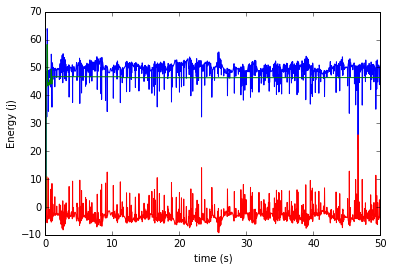

In [44]:
# Store values for T = 4.
potential_energy2 = np.zeros(shape=(len(t_array[:]),1))
kinetic_energy2 = np.zeros(shape=(len(t_array[:]),1))     
Total_energy2 = np.zeros(shape=(len(t_array[:]),1))

potential_energy4 = potential_energy
kinetic_energy4 = kinetic_energy
Total_energy4 = Total_energy

# Plot energy of T=4.
pyplot.plot(t_array[:], kinetic_energy4[:], color='blue', ls='-', lw=1, label='Kinetic Energy')
pyplot.plot(t_array[:], potential_energy4[:], color='red', ls='-', lw=1, label='Potential Energy')
pyplot.plot(t_array[:], Total_energy4[:], color='green', ls='-', lw=1, label='Total Energy T=2.')
pyplot.xlabel('time (s)')
pyplot.ylabel('Energy (j)');

------------------------------------------------------------.

Temperature Plots are Below:

------------------------------------------------------------.

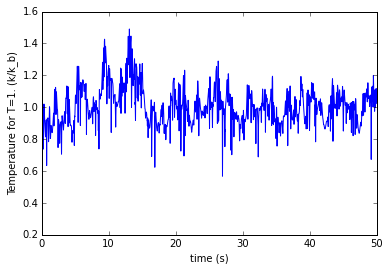

In [27]:
# Plot Temperature for T = 1.
T_total1 = np.zeros(shape=(len(t_array[:]),1))

T_total1 = T_total

pyplot.plot(t_array[:], T_total1[:], color='blue', ls='-', lw=1)
pyplot.xlabel('time (s)')
pyplot.ylabel('Temperature for T=1. (k/k_b)');

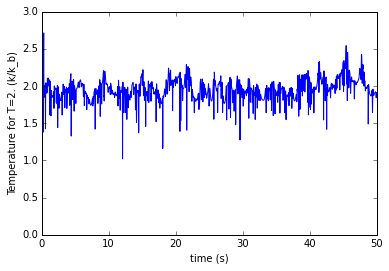

In [40]:
# Plot Temperature for T = 2.
T_total2 = np.zeros(shape=(len(t_array[:]),1))

T_total2 = T_total

pyplot.plot(t_array[:], T_total2[:], color='blue', ls='-', lw=1)
pyplot.xlabel('time (s)')
pyplot.ylabel('Temperature for T=2. (k/k_b)');

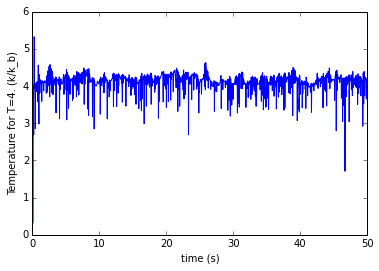

In [45]:
# Plot Temperature for T = 4.
T_total4 = np.zeros(shape=(len(t_array[:]),1))

T_total4 = T_total

pyplot.plot(t_array[:], T_total4[:], color='blue', ls='-', lw=1)
pyplot.xlabel('time (s)')
pyplot.ylabel('Temperature for T=4. (k/k_b)');